In [59]:
! pip install seaborn
! pip install missingno
! pip install graphviz

In [37]:
#To read everything corrected so it can be read in Panda
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
observations_df = pd.read_csv(r'mushrom_observations.csv', delimiter = ';')
observations_df.head()
characteristics_df = pd.read_csv(r'mushroom_characteristics.csv', delimiter = ';')
characteristics_df.head()

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
0,Amanita Family,Fly Agaric,p,"[10, 20]","[x, f]","[g, h]","[e, o]",[f],[e],NaN,...,[s],[y],[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a, w]"
1,Amanita Family,Panther Cap,p,"[5, 10]","[p, x]",[g],[n],[f],[e],NaN,...,NaN,[y],[w],[u],[w],[t],[p],NaN,[d],"[u, a]"
2,Amanita Family,False Panther Cap,p,"[10, 15]","[x, f]",NaN,"[g, n]",[f],[e],NaN,...,NaN,NaN,[w],[u],[w],[t],"[e, g]",NaN,[d],"[u, a]"
3,Amanita Family,The Blusher,e,"[5, 15]","[x, f]",NaN,[n],[t],NaN,NaN,...,[b],NaN,[w],[u],[w],[t],[g],NaN,[d],"[u, a]"
4,Amanita Family,Death Cap,p,"[5, 12]","[x, f]",[h],[r],[f],NaN,[c],...,NaN,NaN,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a]"


In [28]:
#Basic inspections
observations_df.info()
characteristics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [18]:
# Separate columns by type
categorical_cols = observations_df.select_dtypes(include='object').columns.tolist()
numerical_cols = observations_df.select_dtypes(include='float64').columns.tolist()

print("Categorical:", categorical_cols)
print("Numerical:", numerical_cols)


Categorical: ['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']
Numerical: ['cap-diameter', 'stem-height', 'stem-width']


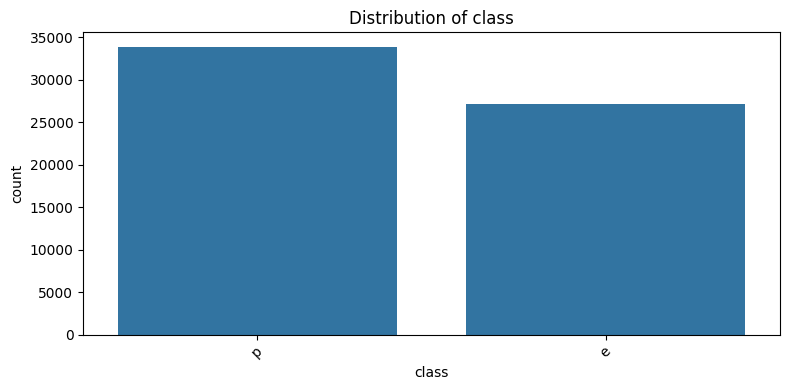

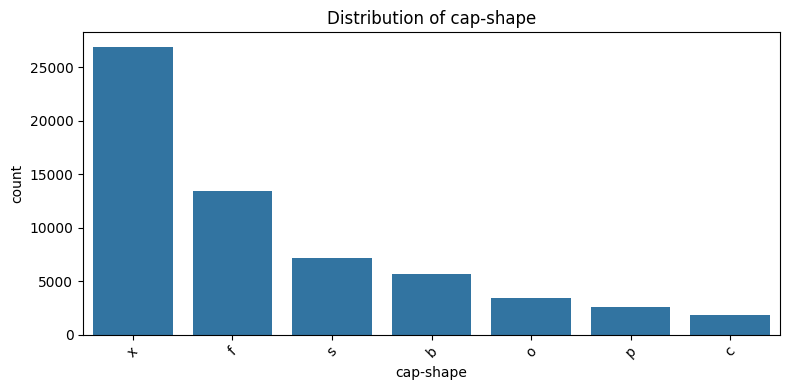

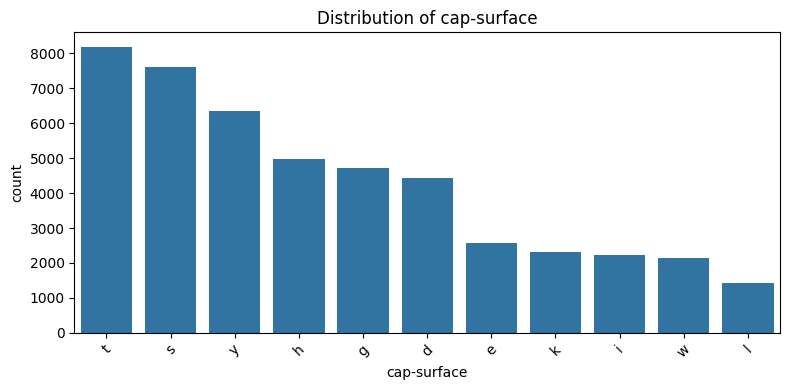

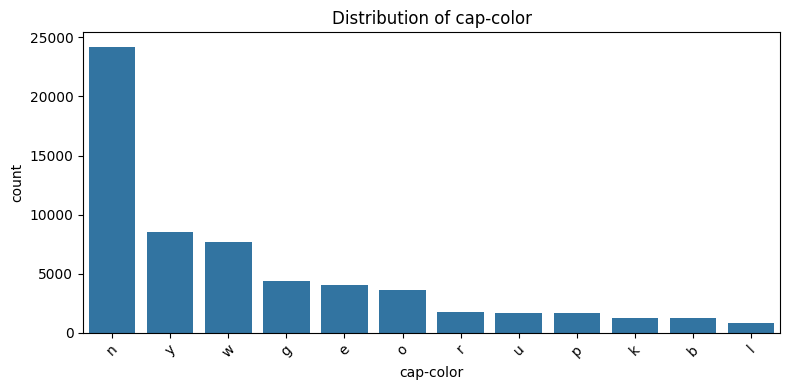

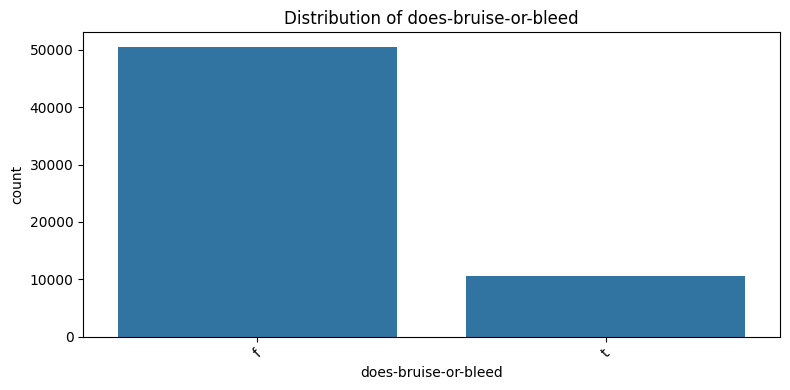

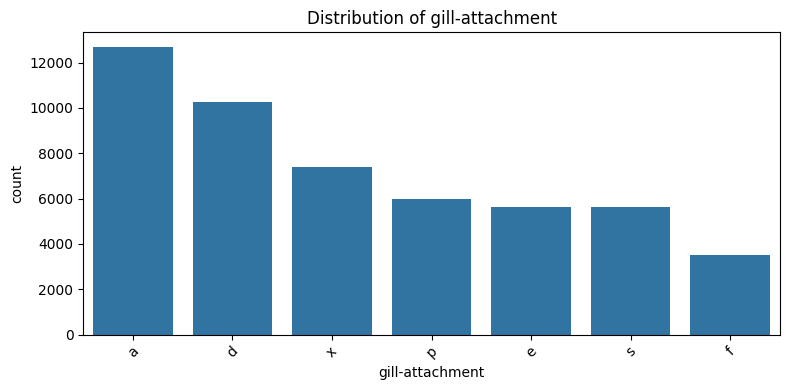

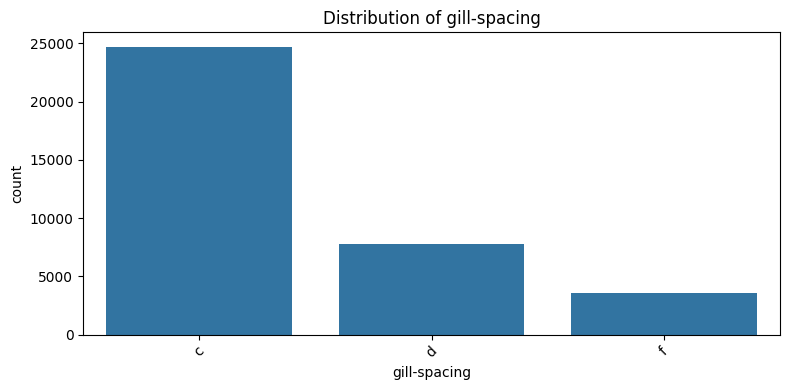

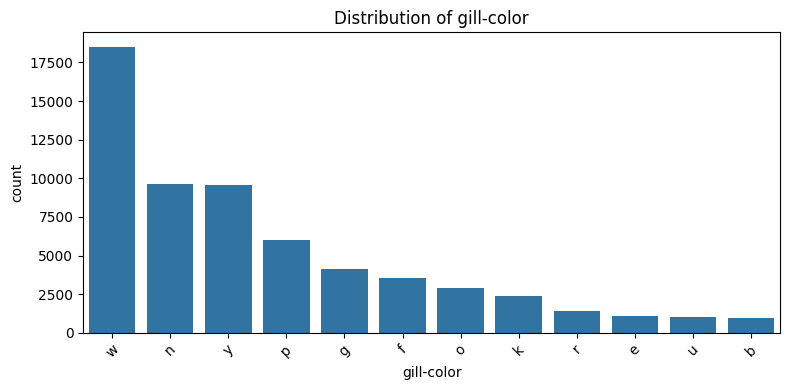

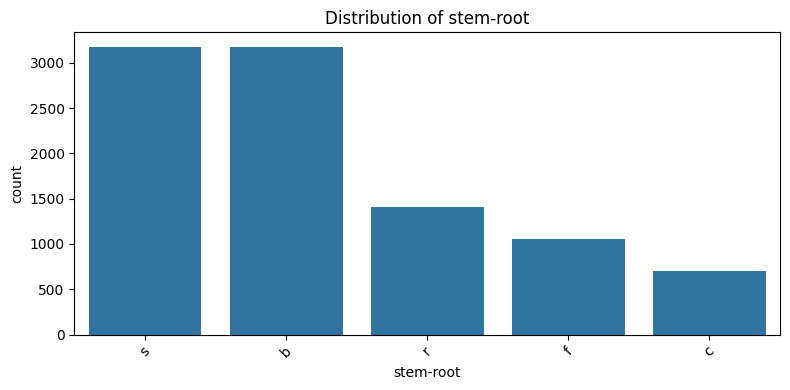

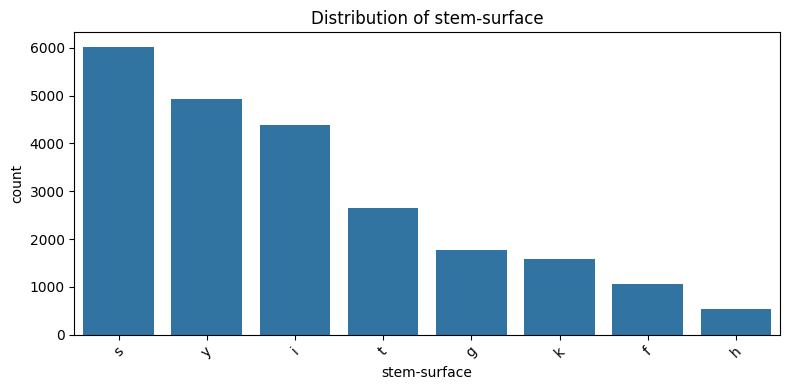

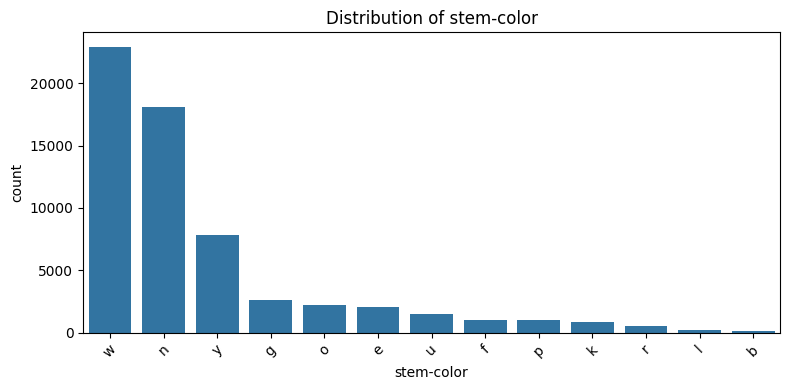

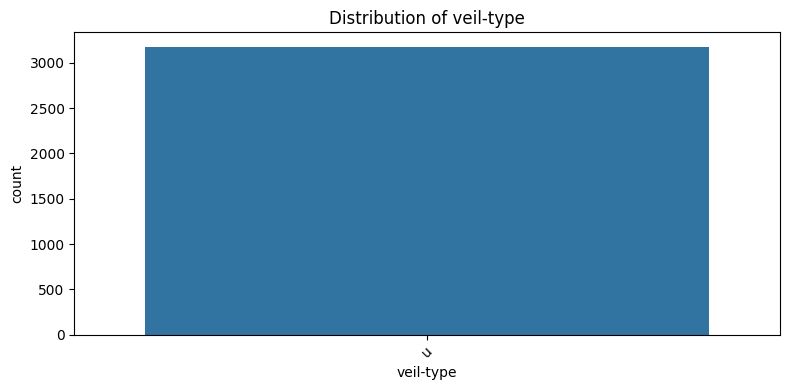

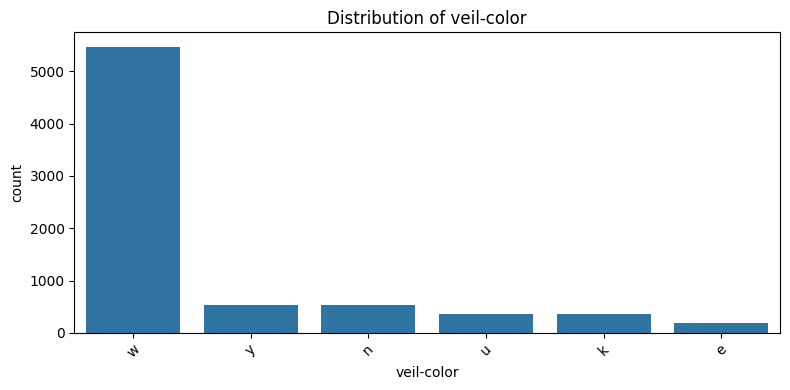

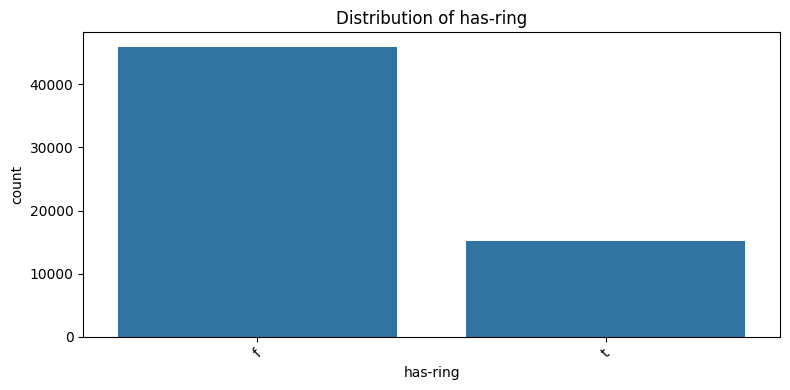

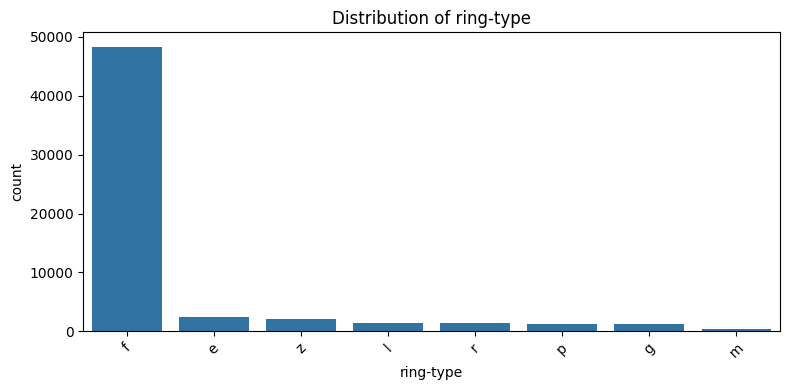

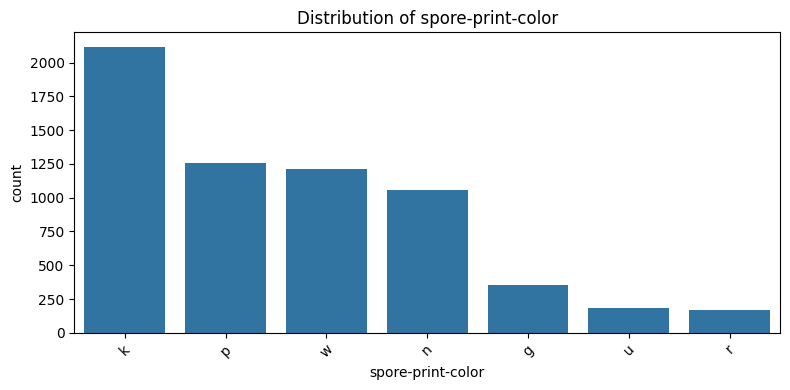

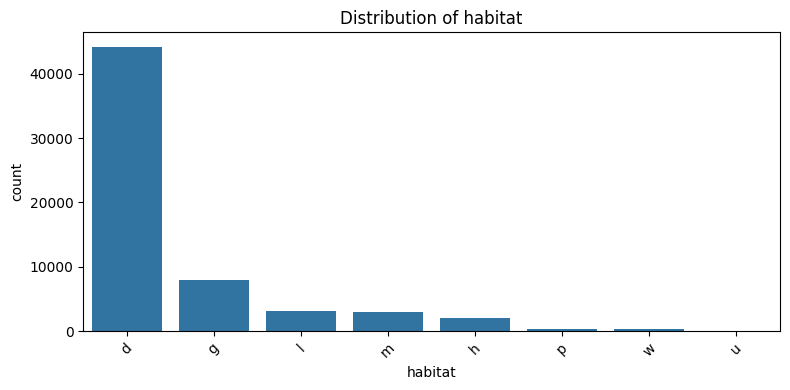

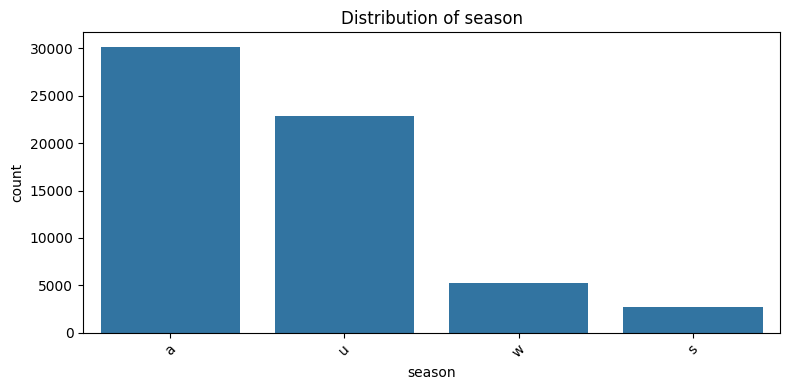

In [29]:
# Count plots for all categorical variables

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=observations_df, x=col, order=observations_df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

In [ ]:
#Forget about veil-type

Forget about veil type, only u.

Has-ring only 2 types.

Does bruise or bleed two types.

Two classes.

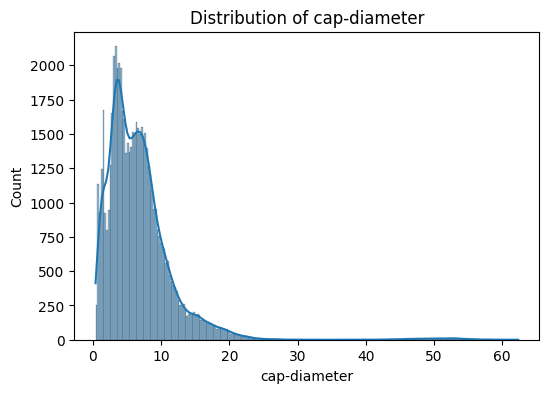

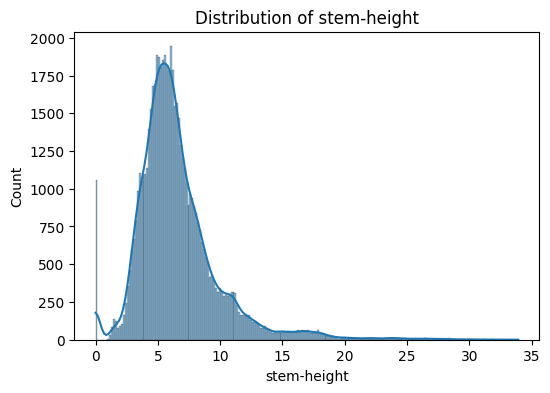

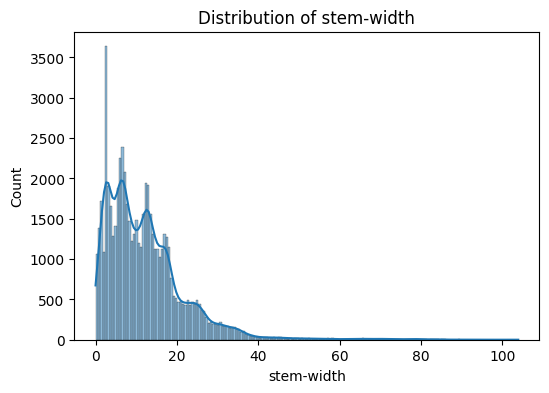

In [30]:
# Histograms for numerical features
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=observations_df, x=col, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
# Edible versus poisonous Bivarial analysis not enough detail
for col in categorical_cols:
    if col != 'class':
        plt.figure(figsize=(8, 4))
        sns.countplot(data=observations_df, x=col, hue='class', order=observations_df[col].value_counts().index)
        plt.title(f"{col} distribution by class")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

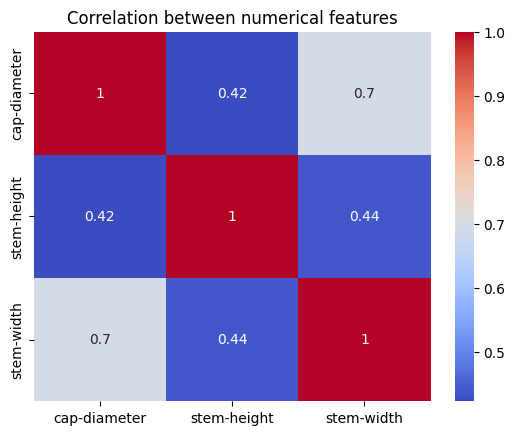

In [34]:
# Heatmap of correlations between numerical features
sns.heatmap(observations_df[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between numerical features")
plt.show()

In [35]:
from scipy.stats import chi2_contingency

for col in categorical_cols:
    if col != 'class':
        table = pd.crosstab(observations_df[col], observations_df['class'])
        chi2, p, _, _ = chi2_contingency(table)
        print(f"{col}: p = {p:.4f}")

cap-shape: p = 0.0000
cap-surface: p = 0.0000
cap-color: p = 0.0000
does-bruise-or-bleed: p = 0.0000
gill-attachment: p = 0.0000
gill-spacing: p = 0.0000
gill-color: p = 0.0000
stem-root: p = 0.0000
stem-surface: p = 0.0000
stem-color: p = 0.0000
veil-type: p = 1.0000
veil-color: p = 0.0000
has-ring: p = 0.0000
ring-type: p = 0.0000
spore-print-color: p = 0.0000
habitat: p = 0.0000
season: p = 0.0000


ALl but the vei-type are significant

C:\Users\monserrj\AppData\Local\Temp\ipykernel_26696\344110632.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


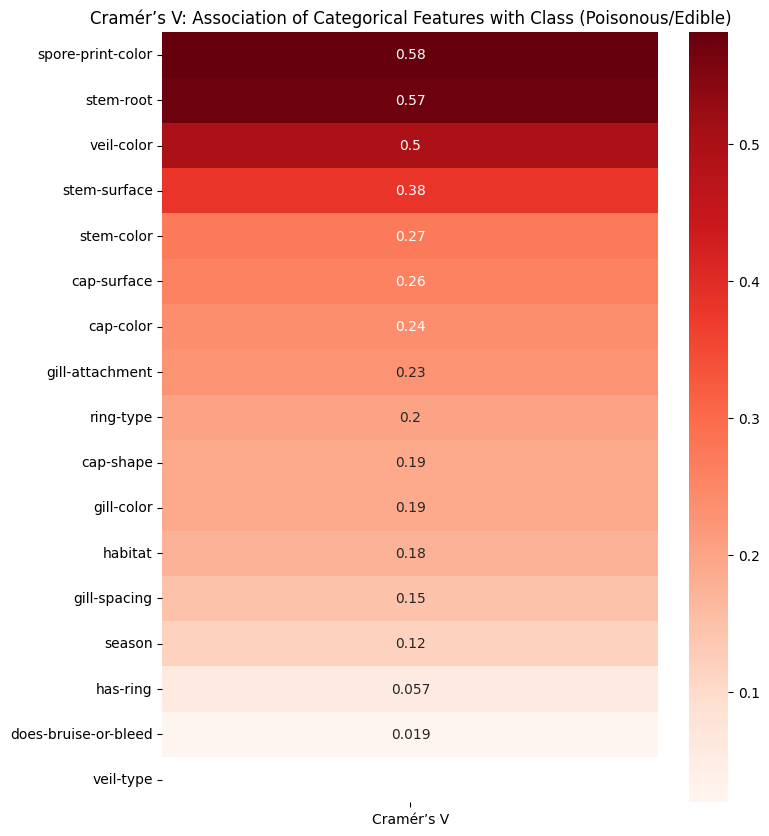

In [38]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Compute Cramér's V for all categorical features against 'class'
categorical_cols = observations_df.select_dtypes(include='object').columns
categorical_cols = [col for col in categorical_cols if col != 'class']

cramers_results = {}
for col in categorical_cols:
    cramers_results[col] = cramers_v(observations_df[col], observations_df['class'])

# Plot heatmap
cramers_df = pd.DataFrame.from_dict(cramers_results, orient='index', columns=['Cramér’s V'])
plt.figure(figsize=(8, 10))
sns.heatmap(cramers_df.sort_values(by='Cramér’s V', ascending=False), annot=True, cmap='Reds')
plt.title("Cramér’s V: Association of Categorical Features with Class (Poisonous/Edible)")
plt.show()


In [41]:
feature = 'spore-print-color'  # try for each top Cramér's V feature

# Get normalized proportions
pd.crosstab(observations_df[feature], observations_df['class'], normalize='index').sort_values(by='p', ascending=False)

class,e,p
spore-print-color,,
n,0.000000,1.000000
u,0.000000,1.000000
r,0.000000,1.000000
k,0.166667,0.833333
p,0.280381,0.719619
w,0.582508,0.417492
g,1.000000,0.000000


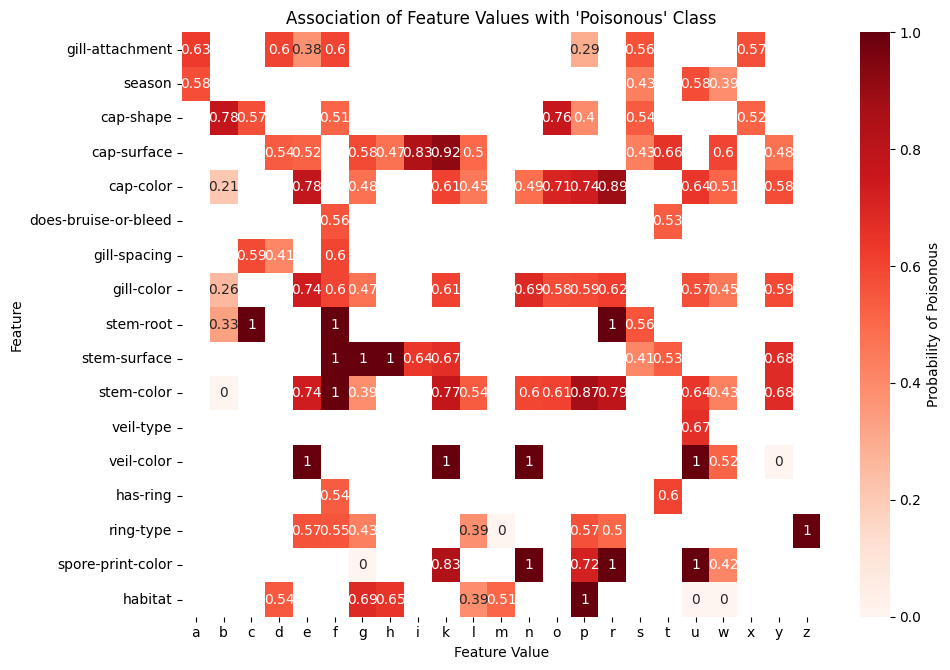

In [43]:
# Define target and categorical features
target = 'class'
categorical_cols = observations_df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove(target)  # exclude class from analysis

# Store top values associated with poisonous
poisonous_matrix = {}

for col in categorical_cols:
    # Crosstab with row-wise normalization
    ct = pd.crosstab(observations_df[col], observations_df[target], normalize='index')

    # Only keep poisonous column
    if 'p' in ct.columns:
        poisonous_matrix[col] = ct['p']

# Combine all into a DataFrame
poisonous_df = pd.DataFrame(poisonous_matrix).T  # transpose so features are rows

# Sort by max poisonous association
poisonous_df = poisonous_df.sort_values(by=poisonous_df.columns[0], ascending=False)

# Plot as heatmap
plt.figure(figsize=(10, len(poisonous_df) * 0.4))
sns.heatmap(poisonous_df, annot=True, cmap="Reds", cbar_kws={'label': 'Probability of Poisonous'})
plt.title("Association of Feature Values with 'Poisonous' Class")
plt.xlabel("Feature Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


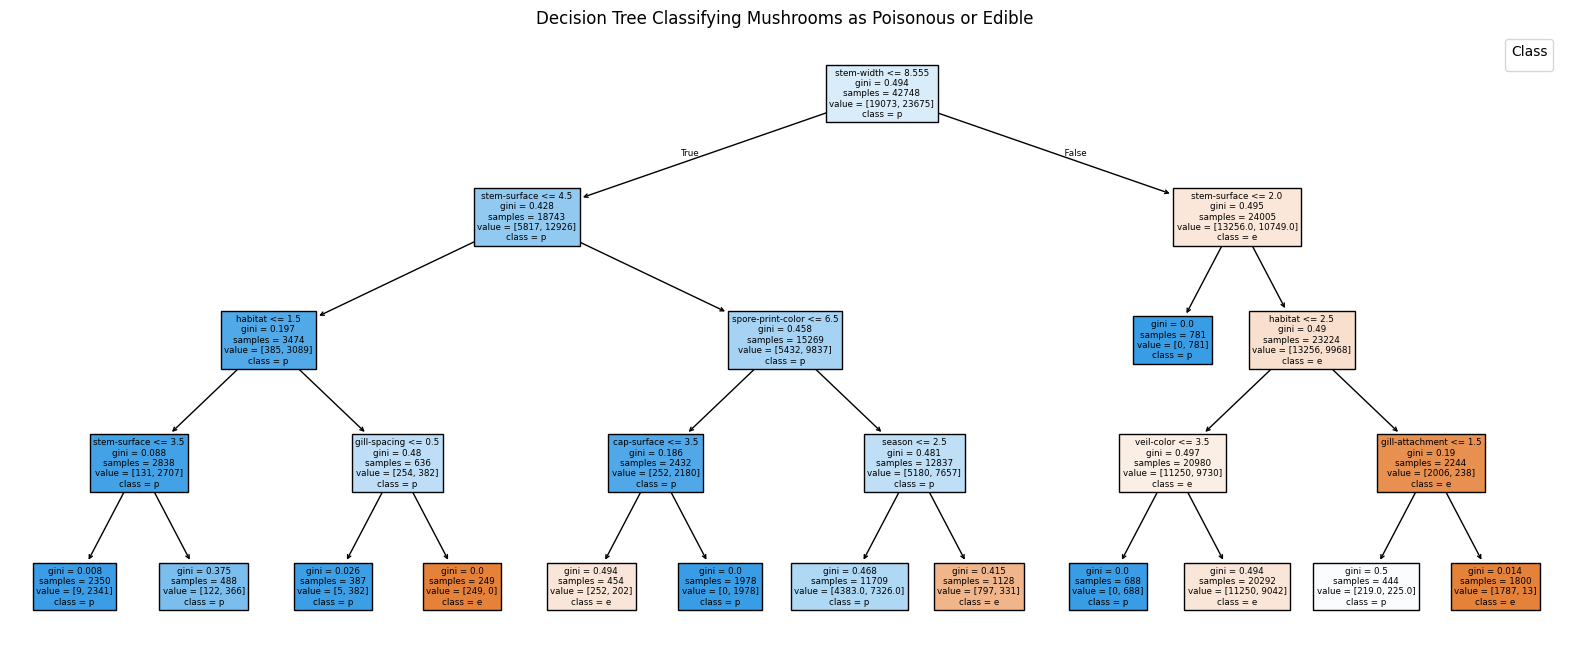

In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df_encoded = observations_df.copy()
le_dict = {}

# Encode all categorical features (including 'class')
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    le_dict[col] = le  # store encoders for later interpretation


# Define features and target
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']  # 0 = edible, 1 = poisonous

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train decision tree
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)  # adjust depth for clarity
tree_clf.fit(X_train, y_train)

# Plot (blue=edible, red=poisonous)
plt.figure(figsize=(20, 8))
plot_tree(tree_clf, feature_names=X.columns, class_names=le_dict['class'].classes_, filled=True)
plt.title("Decision Tree Classifying Mushrooms as Poisonous or Edible")
plt.legend(title="Class", labels=["Edible", "Poisonous"])
plt.show()

Key points:
Range: 0 to 0.5 (for binary classification)

0 → all samples in the node belong to a single class (pure node)

0.5 → classes are perfectly mixed (maximum impurity in binary classification)

Formula (binary case):

Gini = 1 - (p1^2 - p2^2)
  p1 and p2 are the proportions of the two classes in that node.

Interpretation:

A low Gini means the node is mostly one class.

A high Gini means the node contains a mix of classes

In [55]:
from sklearn.metrics import accuracy_score

# Predict on test set
y_pred = tree_clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

Decision Tree Accuracy: 0.66


If I include the other data set my decision tree may improve

In [56]:
# Standardise column names (lowercase and replace hyphens with underscores)
observations_df.columns = [col.lower().replace('-', '_') for col in observations_df.columns]
characteristics_df.columns = [col.lower().replace('-', '_') for col in characteristics_df.columns]

# --- Drop non-feature columns from characteristics_df ---
characteristics_features = characteristics_df.drop(['family', 'name'], axis=1)

# Combine dataset:
combined_df = pd.concat([observations_df, characteristics_features], ignore_index=True)

# --- Prepare features and target ---
X = combined_df.drop('class', axis=1)
y = combined_df['class']

# Convert categorical features to numeric
X = pd.get_dummies(X, drop_first=True)

# --- Split into train and test sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Train the decision tree ---
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# --- Predict and evaluate ---
y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy on combined dataset: {accuracy:.2f}")


Decision Tree Accuracy on combined dataset: 1.00


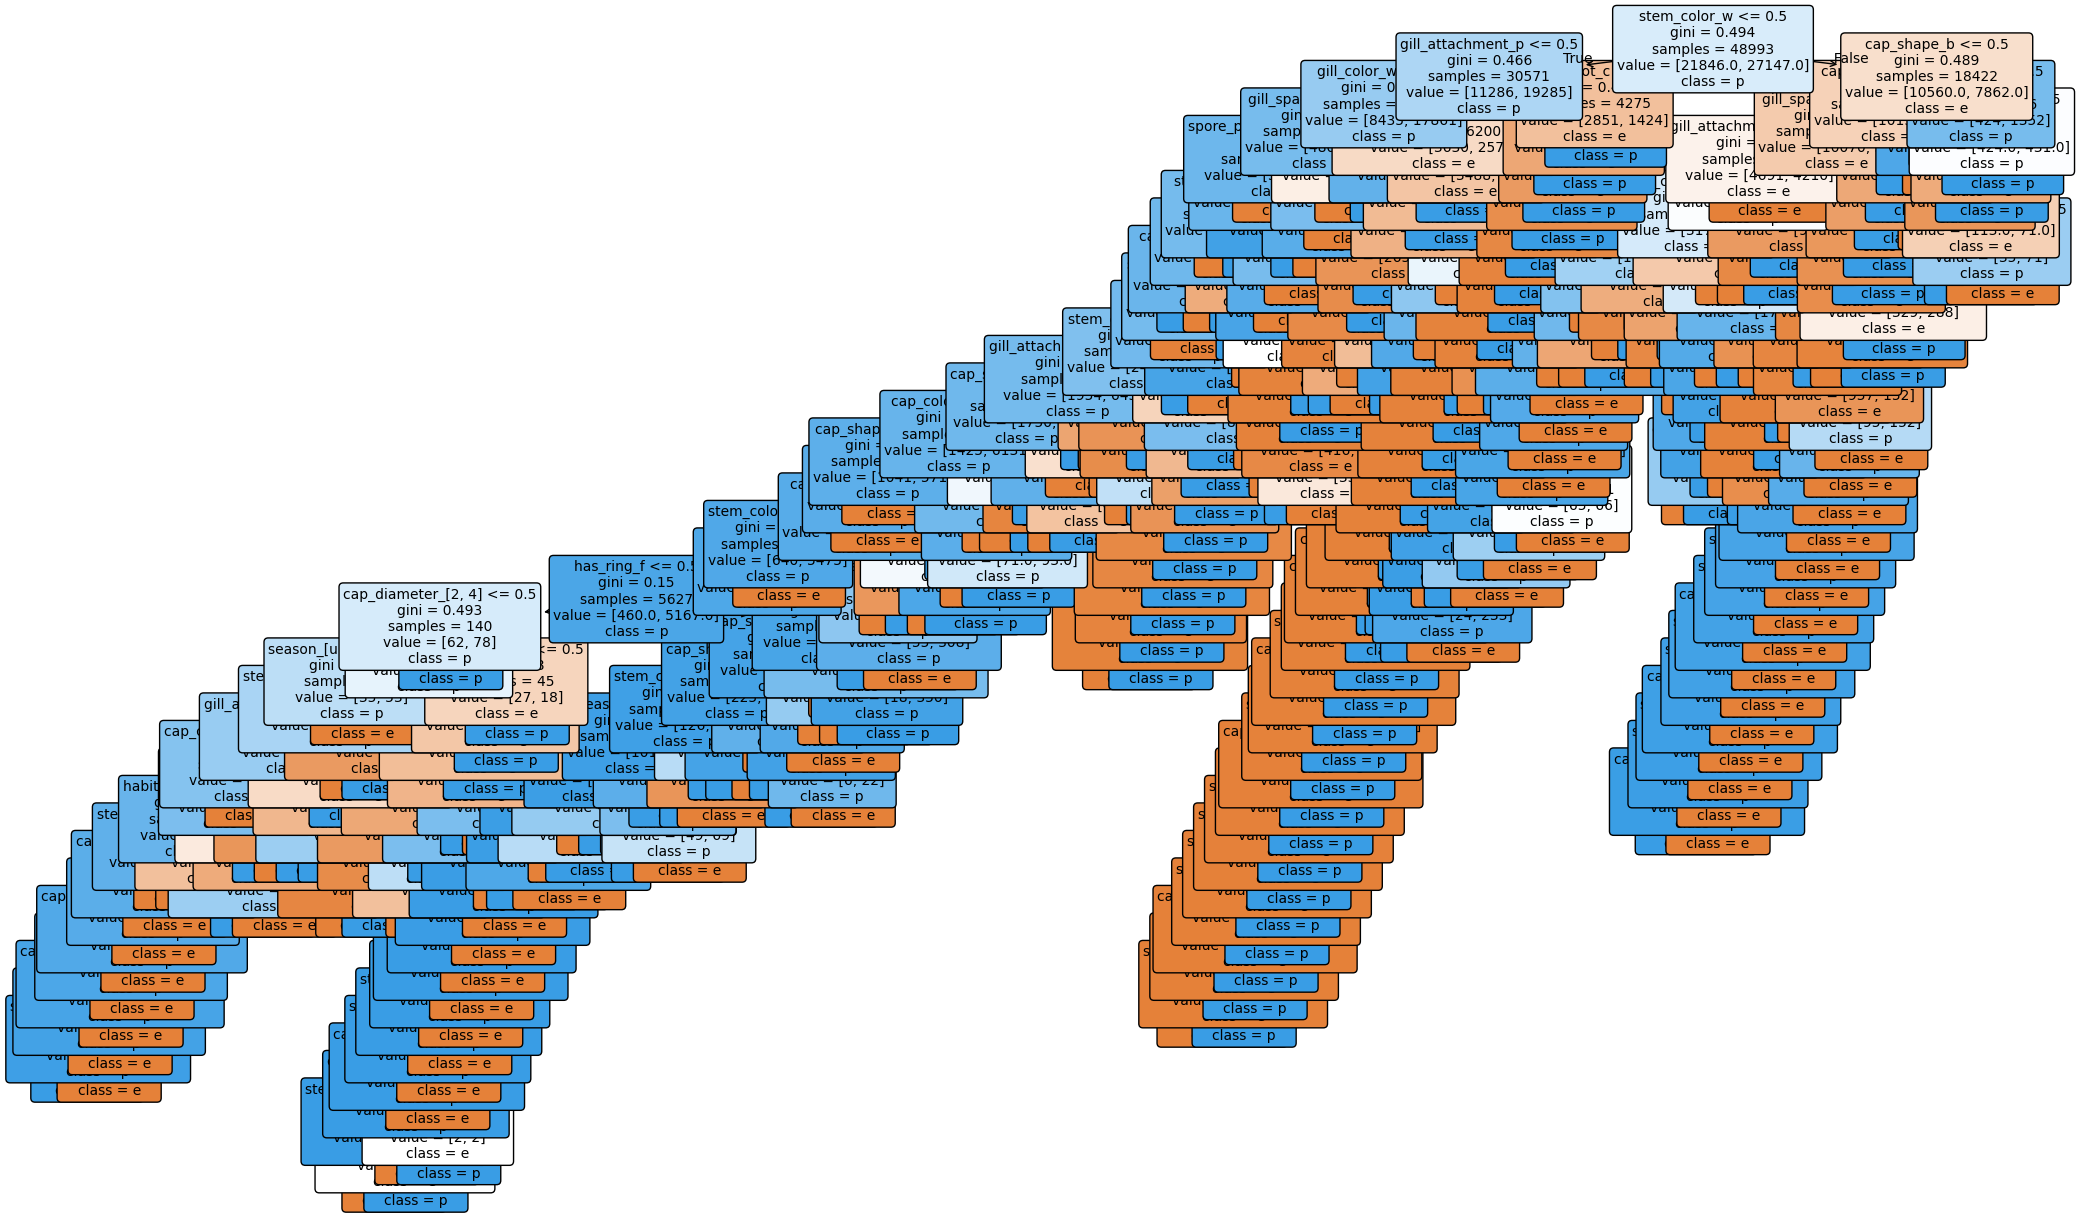

In [61]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the figure size
plt.figure(figsize=(25, 15))  # Adjust depending on tree size

# Plot the tree
tree.plot_tree(
    tree_clf,
    feature_names=X.columns,   # Feature names
    class_names=tree_clf.classes_,  # Target class names
    filled=True,               # Color nodes by class
    rounded=True,              # Rounded nodes for readability
    fontsize=10                # Font size
)

# Show the plot
plt.show()

I need my tree simple, more accurate but to complex

In [76]:
# Updated mappings to match lowercase and underscores
feature_map = {
    # Cap shape
    'cap_shape_b': 'cap shape bell',
    'cap_shape_c': 'cap shape conical',
    'cap_shape_x': 'cap shape convex',
    'cap_shape_f': 'cap shape flat',
    'cap_shape_k': 'cap shape knobbed',
    'cap_shape_s': 'cap shape sunken',

    # Cap surface
    'cap_surface_f': 'cap surface fibrous',
    'cap_surface_g': 'cap surface grooves',
    'cap_surface_s': 'cap surface scaly',
    'cap_surface_y': 'cap surface smooth',

    # Cap color
    'cap_color_n': 'cap color brown',
    'cap_color_b': 'cap color buff',
    'cap_color_c': 'cap color cinnamon',
    'cap_color_g': 'cap color gray',
    'cap_color_r': 'cap color green',
    'cap_color_p': 'cap color pink',
    'cap_color_u': 'cap color purple',
    'cap_color_e': 'cap color red',
    'cap_color_w': 'cap color white',
    'cap_color_y': 'cap color yellow',

    # Does bruise or bleed
    'does_bruise_or_bleed_t': 'bruise or bleed',
    'does_bruise_or_bleed_f': 'does not bruise or bleed',

    # Gill attachment
    'gill_attachment_a': 'gill attached',
    'gill_attachment_d': 'gill descending',
    'gill_attachment_f': 'gill free',
    'gill_attachment_n': 'gill notched',
    'gill_attachment_p': 'gill pores',

    # Gill spacing
    'gill_spacing_c': 'gill spacing close',
    'gill_spacing_w': 'gill crowded',
    'gill_spacing_d': 'gill distant',

    # Gill color
    'gill_color_k': 'gill black',
    'gill_color_n': 'gill brown',
    'gill_color_b': 'gill buff',
    'gill_color_h': 'gill chocolate',
    'gill_color_g': 'gill gray',
    'gill_color_r': 'gill green',
    'gill_color_o': 'gill orange',
    'gill_color_p': 'gill pink',
    'gill_color_u': 'gill purple',
    'gill_color_e': 'gill red',
    'gill_color_w': 'gill white',
    'gill_color_y': 'gill yellow',

    # Stem root
    'stem_root_b': 'stem root bulbous',
    'stem_root_c': 'stem root club',
    'stem_root_r': 'stem root rooted',
    'stem_root_u': 'stem root unknown',
    'stem_root_e': 'stem root equal',

    # Stem surface
    'stem_surface_b': 'stem surface bumpy',
    'stem_surface_s': 'stem surface scaly',
    'stem_surface_y': 'stem surface silky',
    'stem_surface_f': 'stem surface smooth',

    # Stem color
    'stem_color_b': 'stem color brown',
    'stem_color_c': 'stem color cinnamon',
    'stem_color_y': 'stem color yellow',
    'stem_color_g': 'stem color gray',
    'stem_color_o': 'stem color orange',
    'stem_color_w': 'stem color white',
    'stem_color_p': 'stem color pink',

    # Veil type
    'veil_type_p': 'veil type partial',

    # Veil color
    'veil_color_o': 'veil color orange',
    'veil_color_w': 'veil color white',
    'veil_color_y': 'veil color yellow',

    # Has ring
    'has_ring_t': 'has a ring',
    'has_ring_f': 'does not have a ring',

    # Ring type
    'ring_type_e': 'ring type evanescent',
    'ring_type_f': 'ring type flaring',
    'ring_type_l': 'ring type large',
    'ring_type_n': 'ring type none',
    'ring_type_p': 'ring type pendant',
    'ring_type_z': 'ring type zone',

    # Spore print color
    'spore_print_color_k': 'spore print black',
    'spore_print_color_n': 'spore print brown',
    'spore_print_color_b': 'spore print buff',
    'spore_print_color_h': 'spore print chocolate',
    'spore_print_color_r': 'spore print green',
    'spore_print_color_o': 'spore print orange',
    'spore_print_color_u': 'spore print purple',
    'spore_print_color_w': 'spore print white',
    'spore_print_color_y': 'spore print yellow',

    # Habitat
    'habitat_g': 'habitat grasses',
    'habitat_l': 'habitat leaves',
    'habitat_m': 'habitat meadows',
    'habitat_p': 'habitat paths',
    'habitat_u': 'habitat urban',
    'habitat_w': 'habitat waste',
    'habitat_d': 'habitat woods',

    # Season
    'season_s': 'spring',
    'season_u': 'summer',
    'season_f': 'fall',
    'season_w': 'winter',
    # Safety
    'class_p':'poisonous',
    'class_e': 'edible'
}

# Map one-hot encoded columns to human-readable names
X.columns = [feature_map.get(col, col) for col in X.columns]

Decision Tree Accuracy: 0.72


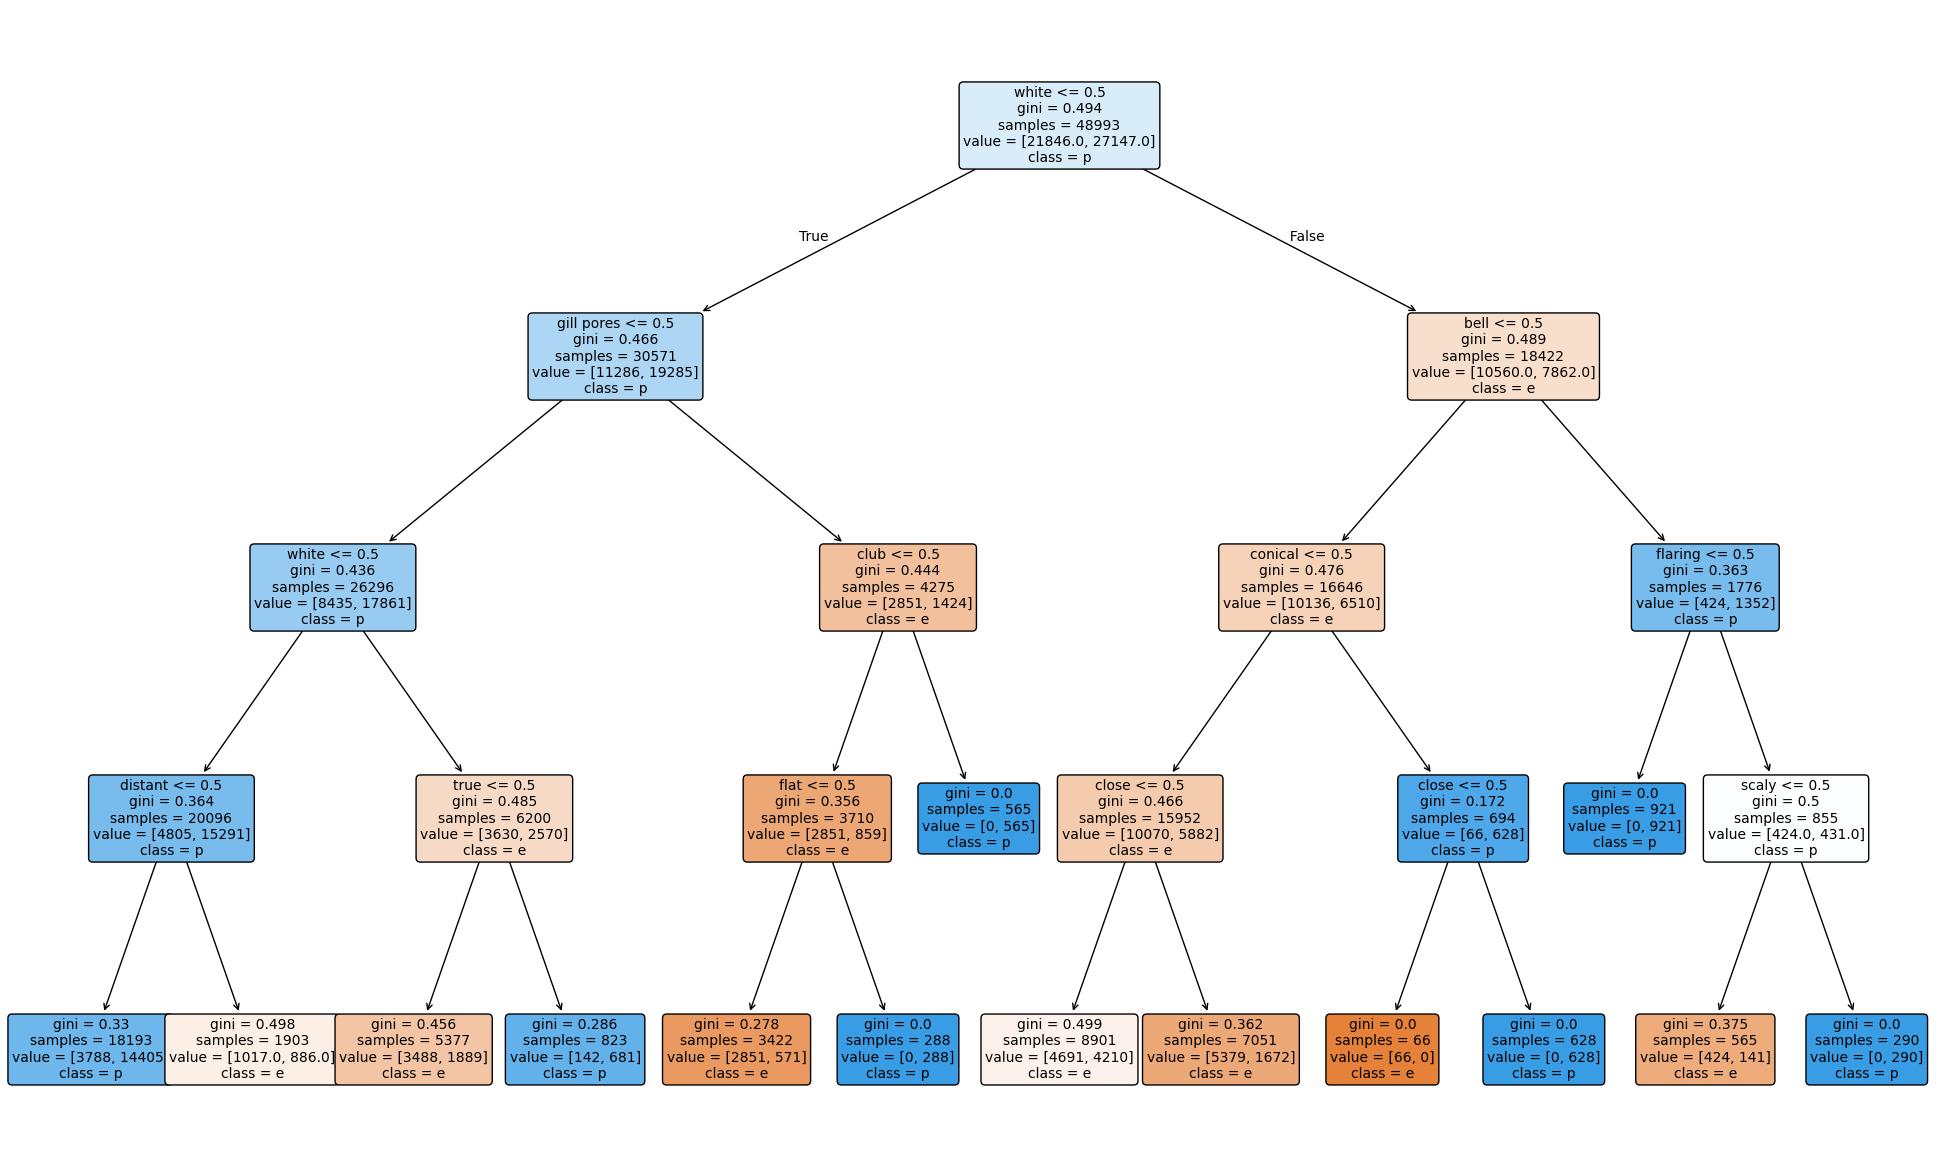

In [77]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train simplified decision tree
tree_clf = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=50,
    min_samples_leaf=20,
    random_state=42
)
tree_clf.fit(X_train, y_train)

# Accuracy
y_pred = tree_clf.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Visualize tree
plt.figure(figsize=(25, 15))
plot_tree(
    tree_clf,
    feature_names=X.columns,
    class_names=tree_clf.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

logistic regression

To find the best multidimensional version to separate the ones from the zeros

Replace numbers with letters (sklearn)